인공지능 > 머신러닝 > 딥러닝

머신러닝: 인공지능 구현을 위해 데이터를 학습해서 예측하는 것

딥러닝: 머신러닝의 한 분야로, 인공신경망(ANN)을 이용하여 데이터 학습해서 예측하는 것

신경망: 뉴런들이 신호를 받아서 임계값을 넘으면 다음 뉴런들에게 신호 전달

인공신경망: Logistic Regression으로 뉴런을 대체하고 이런것들 많이 만들어서 모델링하였음

딥러닝에서는 입력층과 출력층 사이의 한개이상의 은닉층이 존재!

Feed Forward: 데이터가 입력층으로 들어가서 은닉층을 거쳐서 출력층으로 나가서 손실함수가 계산되는 것

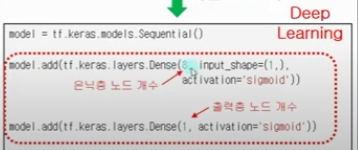

이렇게 하나의 층이 더 들어감

In [1]:
import tensorflow as tf
import numpy as np

데이터 생성

In [2]:
x_data = np.array([2,4,6,8,10,12,14,16,18,20]).astype('float32')
t_data = np.array([0,0,0,0,0,0,1,1,1,1]).astype('float32')

모델 구축

In [3]:
# 프롬 임포트 구문 위에서 안 쓴 대신 다 쓴 것!
model = tf.keras.models.Sequential()
# 8개의 은닉층을 가지는 모델
# 이 각각이 하나의 입력층 노드를 하나를 가짐.
model.add(tf.keras.layers.Dense(8, input_shape=(1,), activation='sigmoid'))
# 출력층 노드개수가 하나인 출력층과 연결되어있음.
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

모델 컴파일

In [4]:
# 이항분류여서 바이너리 크로스 엔트로피가 손실함수
# 측정지표는 정확도
model.compile(tf.keras.optimizers.SGD(learning_rate=0.1), loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


은닉층: 학습되는 바이어스 개수(Param #) = 가중치개수 (1 * 8) + 바이어스 개수(8)

출력층: (가중치 개수)(8 * 1) + 1(바이어스 개수) = 9

In [5]:
hist = model.fit(x_data, t_data, epochs = 500)

 0.4513 - accuracy: 1.0000
Epoch 302/500
1/1 [==============================] - 0s 998us/step - loss: 0.4506 - accuracy: 1.0000
Epoch 303/500
1/1 [==============================] - 0s 997us/step - loss: 0.4498 - accuracy: 1.0000
Epoch 304/500
1/1 [==============================] - 0s 998us/step - loss: 0.4491 - accuracy: 1.0000
Epoch 305/500
1/1 [==============================] - 0s 998us/step - loss: 0.4484 - accuracy: 1.0000
Epoch 306/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 1.0000
Epoch 307/500
1/1 [==============================] - 0s 998us/step - loss: 0.4469 - accuracy: 1.0000
Epoch 308/500
1/1 [==============================] - 0s 997us/step - loss: 0.4462 - accuracy: 1.0000
Epoch 309/500
1/1 [==============================] - 0s 997us/step - loss: 0.4454 - accuracy: 1.0000
Epoch 310/500
1/1 [==============================] - 0s 997us/step - loss: 0.4447 - accuracy: 1.0000
Epoch 311/500
1/1 [==============================] - 0s 997us/step

모델 검증(평가)

In [6]:
test_data = np.array([0.5, 3.0, 3.5, 11.0, 13.0, 31.0])
sigmoid_value = model.predict(test_data)
# 이 시그모이드 값이 0.5 초과이면 1을 아니면 0을
logical_value = tf.cast(sigmoid_value > 0.5, dtype=tf.float32)

for i in range(len(test_data)):
  print(test_data[i], sigmoid_value[i], logical_value.numpy()[i])

0.5 [0.04263532] [0.]
3.0 [0.06622308] [0.]
3.5 [0.07449099] [0.]
11.0 [0.40169844] [0.]
13.0 [0.5195461] [1.]
31.0 [0.8360896] [1.]
